In [11]:
import open3d as o3d
import numpy as np
from PIL import Image

left =  np.asarray(Image.open('cones/conesF/im2.ppm').convert('L'))
#disparity = np.asarray(Image.open('cones/conesF/disp2.pgm').convert('L'))
disparity = np.asarray(Image.open('JBFU/upsampled.png').convert('L'))

print(disparity)

scale = 9.88
f = 3740
b = 160

disparity_matrix = disparity
disparity_matrix = (f/scale) * (b/scale) / disparity_matrix

img = o3d.geometry.Image(left.astype('uint8'))
depth = o3d.geometry.Image(disparity_matrix.astype(np.uint16))


rgbd = o3d.geometry.RGBDImage.create_from_color_and_depth(img, depth)
o3d_pinhole = o3d.camera.PinholeCameraIntrinsic()

o3d_pinhole.set_intrinsics(
    left.shape[1], left.shape[0], f, f, 0.5 * left.shape[0], 0.5 * left.shape[1]
)

pcd_from_depth_map = o3d.geometry.PointCloud.create_from_rgbd_image(rgbd, o3d_pinhole)

pcd_from_depth_map.transform([[1, 0, 0, 0], [0, -1, 0, 0], [0, 0, -1, 0], [0, 0, 0, 1]])
o3d.visualization.draw_geometries([pcd_from_depth_map])

[[ 68  68  68 ... 142 131 123]
 [ 68  68  68 ... 128 122 121]
 [ 68  68  68 ... 116 114 117]
 ...
 [212 213 214 ... 181 181 181]
 [212 212 213 ... 185 184 184]
 [212 213 213 ... 186 186 186]]


<ipython-input-11-5a831a81489b>:16: RuntimeWarning: divide by zero encountered in true_divide
  disparity_matrix = (f/scale) * (b/scale) / disparity_matrix


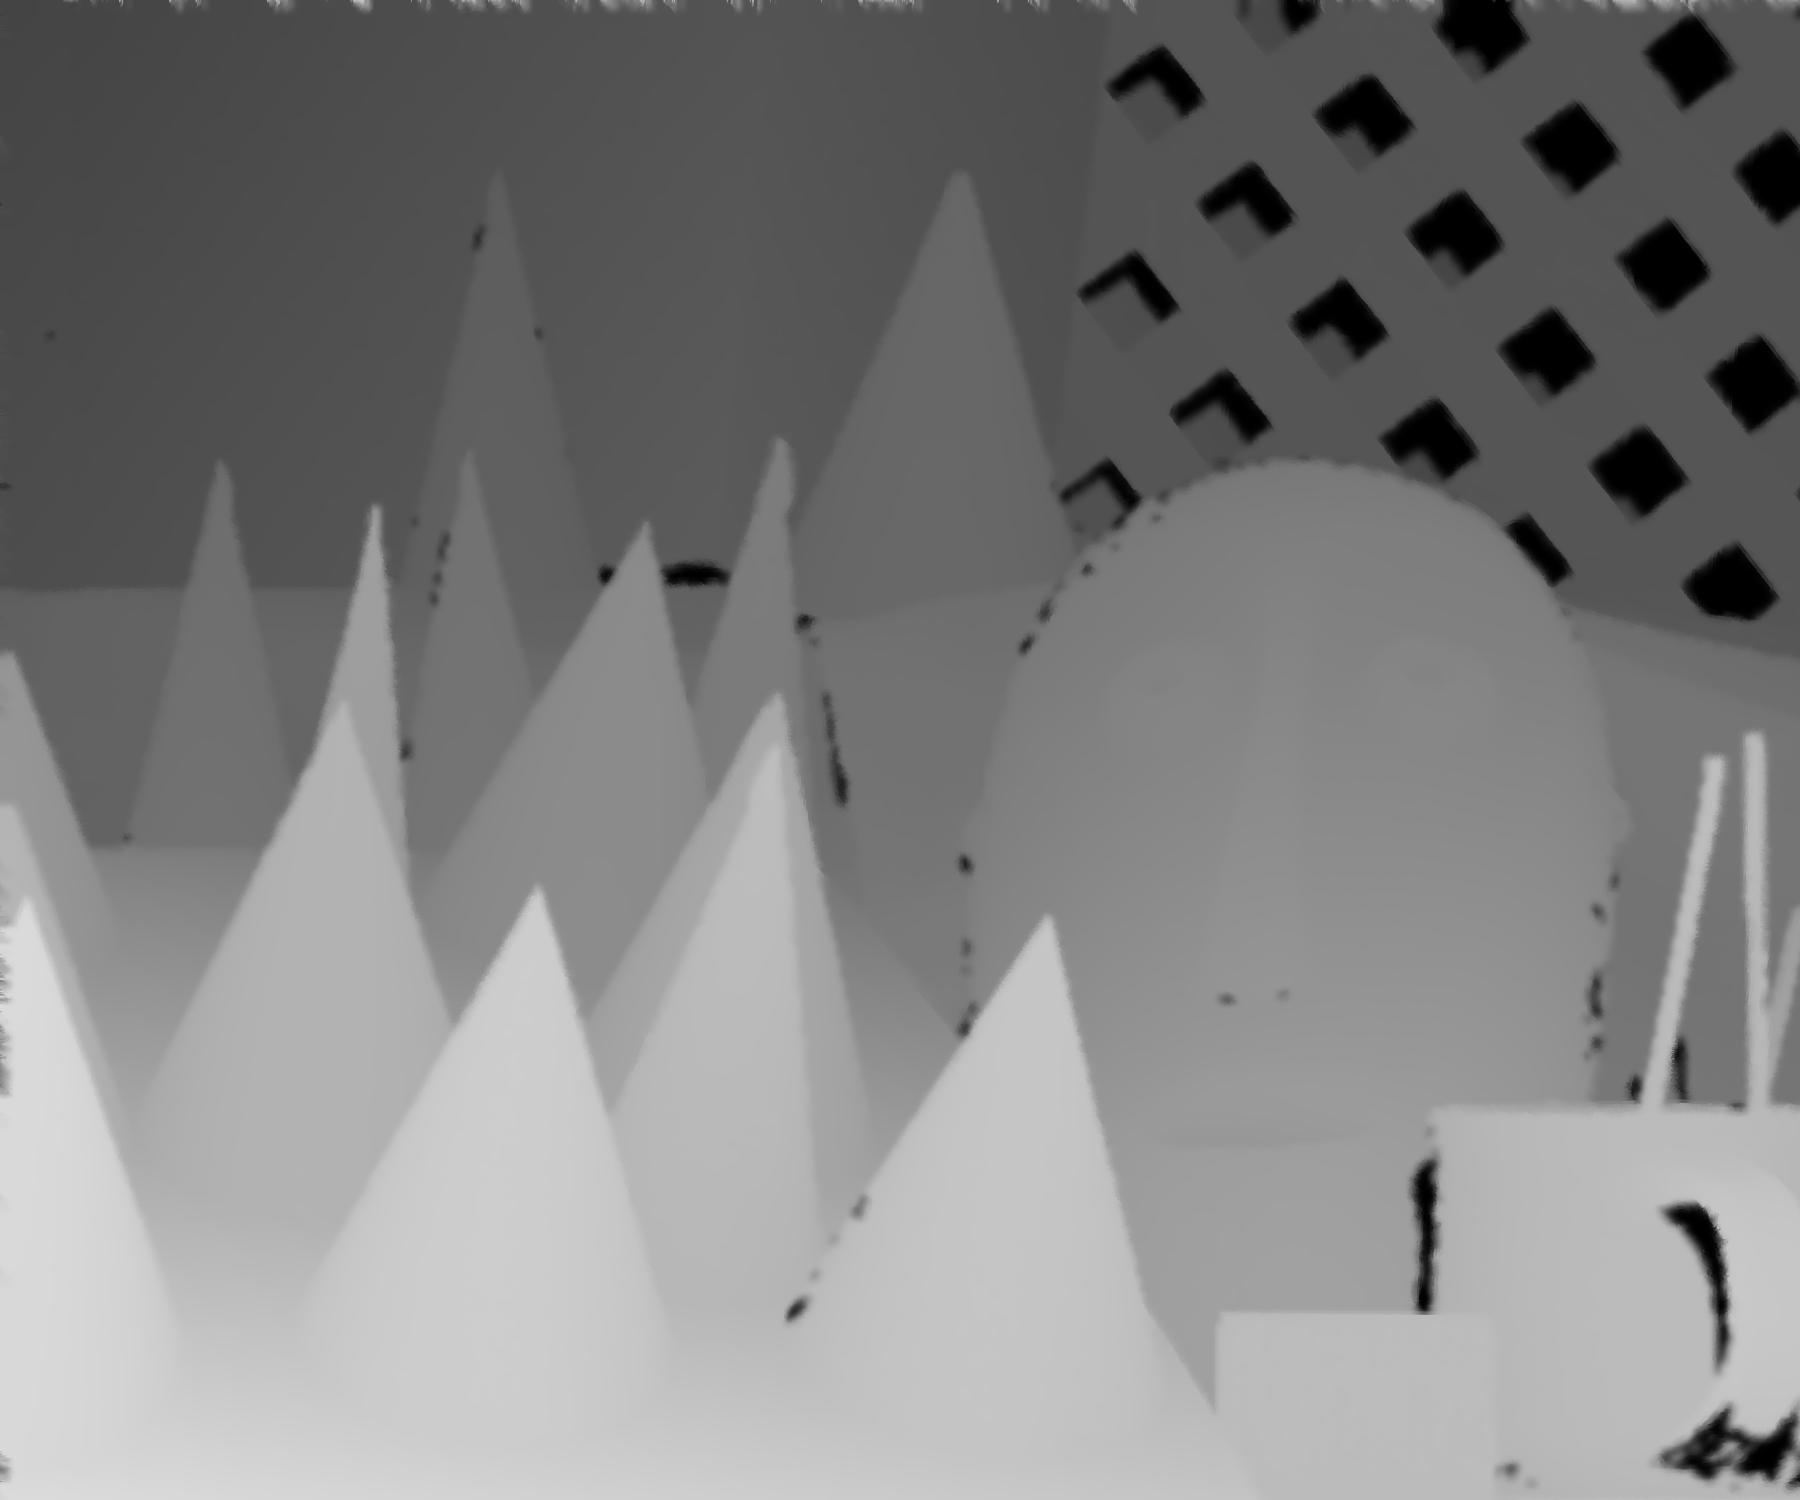

In [6]:
Image.open('JBFU/upsampled.png').convert('L')

In [92]:
disparity = np.asarray(Image.open('upsampeld.png').convert('L'))


In [94]:
disparity.shape

(1536, 2048)

In [97]:
left.shape

(1536, 2048)

In [12]:
import cv2
f = cv2.imread("../data/flash_no_flash/potsWB_00_flash.jpg")


In [19]:
f[:,:,2]

array([[ 54,  56,  57, ..., 149, 131, 138],
       [ 54,  56,  57, ..., 146, 123, 130],
       [ 54,  56,  57, ..., 130, 105, 109],
       ...,
       [ 75,  79,  83, ..., 160, 157, 155],
       [ 78,  81,  83, ..., 158, 153, 150],
       [ 87,  88,  88, ..., 160, 155, 153]], dtype=uint8)